# Caminhos e pacotes

In [1]:
import pandas as pd
pd.options.display.max_colwidth = 200

import os
import re
from sklearn.model_selection import train_test_split
import joblib
from tqdm import tqdm
import soundfile as sf  
from pydub import AudioSegment
import math  
import shutil
import numpy as np
from scipy.io import wavfile
import scipy
from IPython.display import Audio

import matplotlib.pyplot as plt
%matplotlib inline

###################################################################
#Para converter mp3 em wav
from pydub import AudioSegment
AudioSegment.converter = "C:\\ffmpeg\\bin\\ffmpeg.exe"
AudioSegment.ffmpeg = "C:\\ffmpeg\\bin\\ffmpeg.exe"
AudioSegment.ffprobe ="C:\\ffmpeg\\bin\\ffprobe.exe"
###################################################################

#Folder Inicial
path = os.getcwd()
pathin = path + '\\entrada\\'   
pathparcial = path + '\\parcial\\'

## Lendo Base de Treino

In [2]:
df = joblib.load(pathparcial + 'Train.pkl')
#df['path'] = df['path'].apply(lambda x: x.replace('Estratosférica', 'Estratosferica'))
df.reset_index(inplace = True)
df.head(1)

index  \
0      0   

                                                                            path  \
0  C:\Users\laran\Downloads\BaixandoYoutube\entrada\Diogo\AlmaBrasileira\Menores   

                  file cantor  masculino  
0  Musica_0Parte_1.wav  Diogo          1

In [3]:
filename = df['path'][3] + '\\' + df['file'][3]

rate, signal = wavfile.read(filename)
signal = signal[:,0]
#Most audio files will have two (stereo) channels.

#########################################################################################################################
#In each frame in wav there are channels. If you have stereo sound, then each frame contains two samples (left and right).

#Do all channels play along when I play some audio file?
#Yes, unless you chose to play only one channel. Then samples for second channel are ignored.

#If a channel is made up of frames,are all channels equal in length(bit wise)?
#Yes.
#########################################################################################################################

Audio(filename)

### Plot Frequências

In [4]:
### http://wellesleynlp.github.io/spring16/speechAnalysis/index.html

def plotwave(fs, signal, maxf=None):
    """Visualize (a segment of) a wave file."""
    # maxf = maximum number of frames
    frames = scipy.arange(signal.size)   # x-axis
    if maxf:
        plt.plot(frames[:maxf], signal[:maxf])
        plt.xticks(scipy.arange(0, maxf, 0.5*fs), scipy.arange(0, maxf/fs, 0.5))
        plt.show()
    else:
        plt.plot(frames, signal)
        plt.xticks(scipy.arange(0, signal.size, 0.5*fs), scipy.arange(0, signal.size/fs, 0.5))
        plt.show()

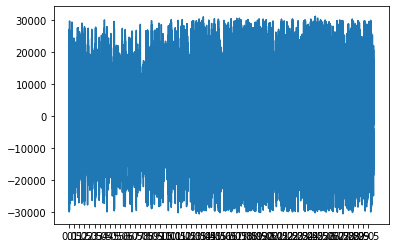

In [5]:
plotwave(rate, signal)

### Downsample

In [6]:
#Downsampling by a factor of n removes all but every nth sample from the original sound, 
#and writes a new file with the same pitch as the original.
#lower resolution of the signal

def downsample(filename, factor):
    """Lower the sampling rate by factor."""
    newfilename = filename[:-4]+'-down'+str(factor)+'.wav'
    fs, wave = wavfile.read(filename)
    wave = wave[:,0]
    newfs = math.floor(fs/factor)
    # fill in the rest
    indices = range(0, wave.size, factor)
    wave = wave[indices]
    wavfile.write(newfilename, newfs, wave)
    
#downsample(filename, 2)
#downsample(filename, 4)
#downsample(filename, 8)
#downsample(filename, 12)

### Fourier Transforms

In [7]:
#Given a sound, we apply Fourier Analysis to decompose it into its frequencies, and visualize them.
def fftplot(fs, signal):
    size = signal.size
    fftresult = abs(scipy.fft(signal)/size)
    freqs = scipy.arange(size)*fs/size
    halfsize = int(size/2)
    plt.plot(freqs[:halfsize], fftresult[:halfsize])
    plt.show()

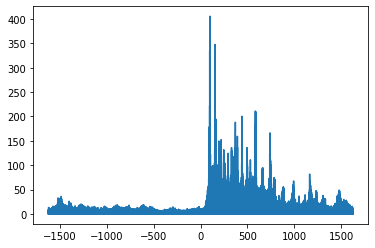

In [8]:
fftplot(fs = rate, signal = signal)

### Spectrogram

In [9]:
#def spectrogram(wavfile):
#    fs, wave = wavfile.read(wavfile)
def spectrogram(fs, wave):
    spec = plt.specgram(wave, NFFT = int(fs * 0.005), Fs = fs, cmap = plt.cm.gray_r, pad_to = 256, noverlap = int(fs*0.0025))
    plt.show()

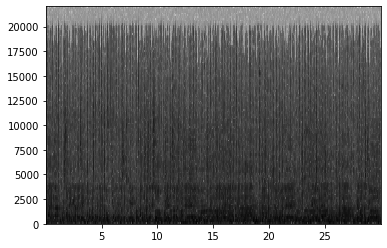

In [10]:
spectrogram(fs = rate, wave = signal)